In [1]:
from bs4 import BeautifulSoup
import pandas as pd

Data has been cleaned and saved to products.csv


In [23]:
# Load the HTML content
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sample E-commerce Website</title>
</head>
<body>
    <h1>Welcome to Our Online Store</h1>
    <div class="product">
        <h2>Product 1</h2>
        <p><strong>Company:</strong> Company A</p>
        <p><strong>Price:</strong> $100</p>
        <p><strong>Description:</strong> This is a great product.</p>
    </div>

    <div class="product">
        <h2>Product 2</h2>
        <p><strong>Company:</strong> Company B</p>
        <p><strong>Price:</strong> $150</p>
        <p><strong>Description:</strong> This product is even better.</p>
    </div>

    <div class="product">
        <h2>Product 3</h2>
        <p><strong>Company:</strong> Company C</p>
        <p><strong>Price:</strong> $200</p>
        <p><strong>Description:</strong> The best product in the market.</p>
    </div>
</body>
</html>
"""

In [22]:
# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Sample E-commerce Website</title>
</head>
<body>
<h1>Welcome to Our Online Store</h1>
<div class="product">
<h2>Product 1</h2>
<p><strong>Company:</strong> Company A</p>
<p><strong>Price:</strong> $100</p>
<p><strong>Description:</strong> This is a great product.</p>
</div>
<div class="product">
<h2>Product 2</h2>
<p><strong>Company:</strong> Company B</p>
<p><strong>Price:</strong> $150</p>
<p><strong>Description:</strong> This product is even better.</p>
</div>
<div class="product">
<h2>Product 3</h2>
<p><strong>Company:</strong> Company C</p>
<p><strong>Price:</strong> $200</p>
<p><strong>Description:</strong> The best product in the market.</p>
</div>
</body>
</html>

In [34]:
soup.find_all('h2').text

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [21]:
# soup.string

In [26]:
# Extract product details
products = []
for product in soup.find_all('div', class_='product'):
    product_name = product.find('h2').text
    company = product.find_all('p')[0].text.split(': ')[1] #[:]
    price = product.find_all('p')[1].text.split(': ')[1].replace('$', '')
    description = product.find_all('p')[2].text.split(': ')[1]
    
    products.append({
        'Product Name': product_name,
        'Company': company,
        'Price': float(price),        # changing one type to another -> typecasting
        'Description': description
    })
    
products

[{'Product Name': 'Product 1',
  'Company': 'Company A',
  'Price': 100.0,
  'Description': 'This is a great product.'},
 {'Product Name': 'Product 2',
  'Company': 'Company B',
  'Price': 150.0,
  'Description': 'This product is even better.'},
 {'Product Name': 'Product 3',
  'Company': 'Company C',
  'Price': 200.0,
  'Description': 'The best product in the market.'}]

In [27]:
# Create a DataFrame
df = pd.DataFrame(products)
df

,Product Name,Company,Price,Description
0,Product 1,Company A,100.0,This is a great product.
1,Product 2,Company B,150.0,This product is even better.
2,Product 3,Company C,200.0,The best product in the market.


In [33]:
# Save the data to a CSV file
df.to_csv('products.csv', index=False)

print("Data has been cleaned and saved to products.csv")


Data has been cleaned and saved to products.csv


In [30]:
df = pd.read_csv('products.csv')

# Display basic statistics
print(df.describe())

       Price
count    3.0
mean   150.0
std     50.0
min    100.0
25%    125.0
50%    150.0
75%    175.0
max    200.0


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('products.csv')

# Display basic statistics
print(df.describe())

       Price
count    3.0
mean   150.0
std     50.0
min    100.0
25%    125.0
50%    150.0
75%    175.0
max    200.0


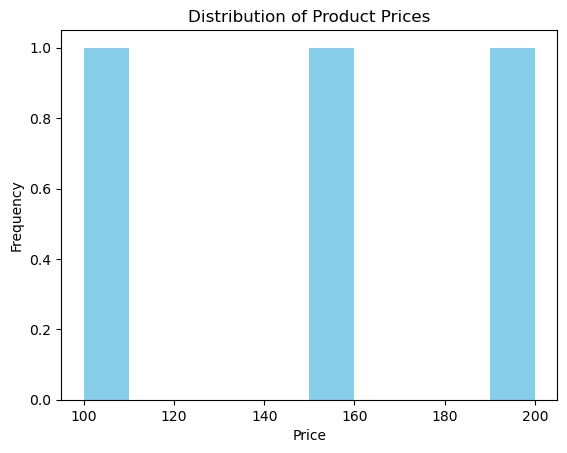

In [7]:
# Plot a histogram of product prices
plt.hist(df['Price'], bins=10, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Analyze products by company
company_counts = df['Company'].value_counts()
print(company_counts)

Company
Company A    1
Company B    1
Company C    1
Name: count, dtype: int64


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Movie Details - Sample Page</title>
<style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f4f4f4;
        }
        .movie-container {
            background-color: white;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);
            margin-bottom: 20px;
        }
        .movie-header {
            text-align: center;
        }
        .movie-title {
            font-size: 24px;
            font-weight: bold;
            margin-bottom: 10px;
        }
        .movie-info {
            margin-bottom: 20px;
        }
        .movie-info p {
            margin: 5px 0;
        }
        .ratings {
            margin-top: 20px;
        }
        .ratings span {
            font-weight: bold;
        }
        .ratings .star {
            color: gold;
        }
</style>
</head>
<body>
 
    <h1>Top 10 Movies</h1>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">The Grand Adventure</h1>
<p><em>Released on: July 21, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Action, Adventure, Fantasy</p>
<p><strong>Director:</strong> Jane Doe</p>
<p><strong>Cast:</strong> John Smith, Emily Johnson, Robert Brown, Anna White</p>
<p><strong>Description:</strong> An epic tale of heroes on a quest to save their kingdom from an ancient evil.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9734;</span> 8.4/10</p>
<p><span>Rotten Tomatoes:</span> 92% Fresh</p>
<p><span>Audience Rating:</span> 4.5/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">The Silent Echo</h1>
<p><em>Released on: March 15, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Drama, Mystery</p>
<p><strong>Director:</strong> Alan Smith</p>
<p><strong>Cast:</strong> Rachel Adams, Michael Lee, Laura Green, David Clarke</p>
<p><strong>Description:</strong> A gripping mystery where the truth is buried deep within silence.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9734;&#9734;</span> 7.2/10</p>
<p><span>Rotten Tomatoes:</span> 80% Fresh</p>
<p><span>Audience Rating:</span> 3.8/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">Space Odyssey 2077</h1>
<p><em>Released on: December 1, 2022</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Sci-Fi, Adventure</p>
<p><strong>Director:</strong> Samantha Wright</p>
<p><strong>Cast:</strong> Tom Harris, Lisa Turner, Greg Wilson, Sarah King</p>
<p><strong>Description:</strong> Journey through the stars in this visually stunning space adventure.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9734;</span> 8.1/10</p>
<p><span>Rotten Tomatoes:</span> 87% Fresh</p>
<p><span>Audience Rating:</span> 4.2/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">The Last Frontier</h1>
<p><em>Released on: October 18, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Western, Action</p>
<p><strong>Director:</strong> Clint Eastwood</p>
<p><strong>Cast:</strong> Brad Pitt, Emma Watson, Morgan Freeman, Liam Neeson</p>
<p><strong>Description:</strong> A wild west showdown with twists and turns at every corner.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9734;</span> 7.9/10</p>
<p><span>Rotten Tomatoes:</span> 85% Fresh</p>
<p><span>Audience Rating:</span> 4.1/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">Romance in Paris</h1>
<p><em>Released on: February 14, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Romance, Drama</p>
<p><strong>Director:</strong> Maria Lopez</p>
<p><strong>Cast:</strong> Julia Roberts, Chris Evans, Natalie Portman, Hugh Jackman</p>
<p><strong>Description:</strong> A love story set in the heart of Paris, filled with passion and drama.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9733;</span> 9.0/10</p>
<p><span>Rotten Tomatoes:</span> 95% Fresh</p>
<p><span>Audience Rating:</span> 4.7/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">Haunted Manor</h1>
<p><em>Released on: October 31, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Horror, Thriller</p>
<p><strong>Director:</strong> John Carpenter</p>
<p><strong>Cast:</strong> Jamie Lee Curtis, Tom Hardy, Jessica Alba, Samuel L. Jackson</p>
<p><strong>Description:</strong> A spine-chilling horror story set in a haunted mansion.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9733;</span> 8.7/10</p>
<p><span>Rotten Tomatoes:</span> 90% Fresh</p>
<p><span>Audience Rating:</span> 4.5/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">The Future is Now</h1>
<p><em>Released on: May 12, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Sci-Fi, Thriller</p>
<p><strong>Director:</strong> Christopher Nolan</p>
<p><strong>Cast:</strong> Leonardo DiCaprio, Anne Hathaway, Matt Damon, Michael Caine</p>
<p><strong>Description:</strong> A thrilling exploration of time and technology's impact on the future.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9733;</span> 8.9/10</p>
<p><span>Rotten Tomatoes:</span> 93% Fresh</p>
<p><span>Audience Rating:</span> 4.6/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">A Day in the Life</h1>
<p><em>Released on: April 9, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Comedy, Drama</p>
<p><strong>Director:</strong> Greta Gerwig</p>
<p><strong>Cast:</strong> Saoirse Ronan, Timothée Chalamet, Florence Pugh, Adam Driver</p>
<p><strong>Description:</strong> A heartwarming comedy-drama about the everyday life of an ordinary family.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9734;&#9734;</span> 7.6/10</p>
<p><span>Rotten Tomatoes:</span> 82% Fresh</p>
<p><span>Audience Rating:</span> 4.0/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">Mystery of the Lost City</h1>
<p><em>Released on: June 20, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Adventure, Mystery</p>
<p><strong>Director:</strong> Steven Spielberg</p>
<p><strong>Cast:</strong> Harrison Ford, Scarlett Johansson, Chris Pratt, Benedict Cumberbatch</p>
<p><strong>Description:</strong> An adventure to uncover the secrets of a long-lost city.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9733;</span> 8.5/10</p>
<p><span>Rotten Tomatoes:</span> 88% Fresh</p>
<p><span>Audience Rating:</span> 4.3/5</p>
</div>
</div>
 
    <div class="movie-container">
<div class="movie-header">
<h1 class="movie-title">Under the Sea</h1>
<p><em>Released on: August 5, 2023</em></p>
</div>
<div class="movie-info">
<p><strong>Genre:</strong> Animation, Family</p>
<p><strong>Director:</strong> John Lasseter</p>
<p><strong>Cast:</strong> Tom Hanks, Ellen DeGeneres, Billy Crystal, John Goodman</p>
<p><strong>Description:</strong> A delightful animated adventure set in the magical world beneath the ocean.</p>
</div>
<div class="ratings">
<p><span>IMDb Rating:</span> <span class="star">&#9733;&#9733;&#9733;&#9733;&#9734;</span> 8.3/10</p>
<p><span>Rotten Tomatoes:</span> 91% Fresh</p>
<p><span>Audience Rating:</span> 4.4/5</p>
</div>
</div>
 
</body>
</html>